Run the following command in terminal: **conda install -c conda-forge imbalanced-learn** OR **install package via Anaconda Navigator**.

Link to Dataset: 
- https://drive.google.com/file/d/1iJ70pz2SVOL9noNjutX1EqIzB4ygJx5x/view?usp=sharing
- https://www.kaggle.com/mlg-ulb/creditcardfraud

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("creditcard.csv")

In [7]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [33]:
#Normalizing the Amount column
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [34]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

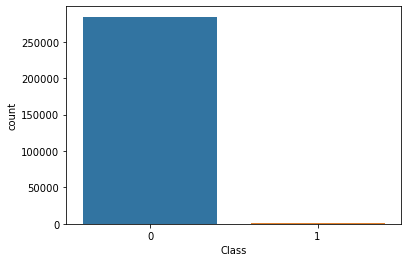

In [35]:
sns.countplot(x="Class", data=df)

The dataset is clearly unbalanced. Let us run a classifier and see what happens.

In [36]:
inputs = df.drop("Class", axis=1).copy()
target = df["Class"]

In [37]:
X = inputs.values
y = target.values

### Train/Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_log)

99.91


In [40]:
confusion_matrix(y_test, y_pred)

array([[71050,    16],
       [   51,    85]])

In [41]:
f1_score(y_test,y_pred)

0.7172995780590719

In [42]:
precision_score(y_test,y_pred)

0.8415841584158416

In [43]:
recall_score(y_test,y_pred)

0.625

In [44]:
roc_auc_score(y_test,y_pred)

0.8123874285875101

ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

Text(0, 0.5, 'True Positive Rate')

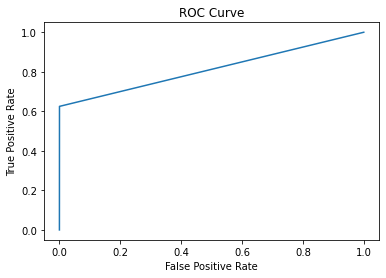

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

### Cross Validation

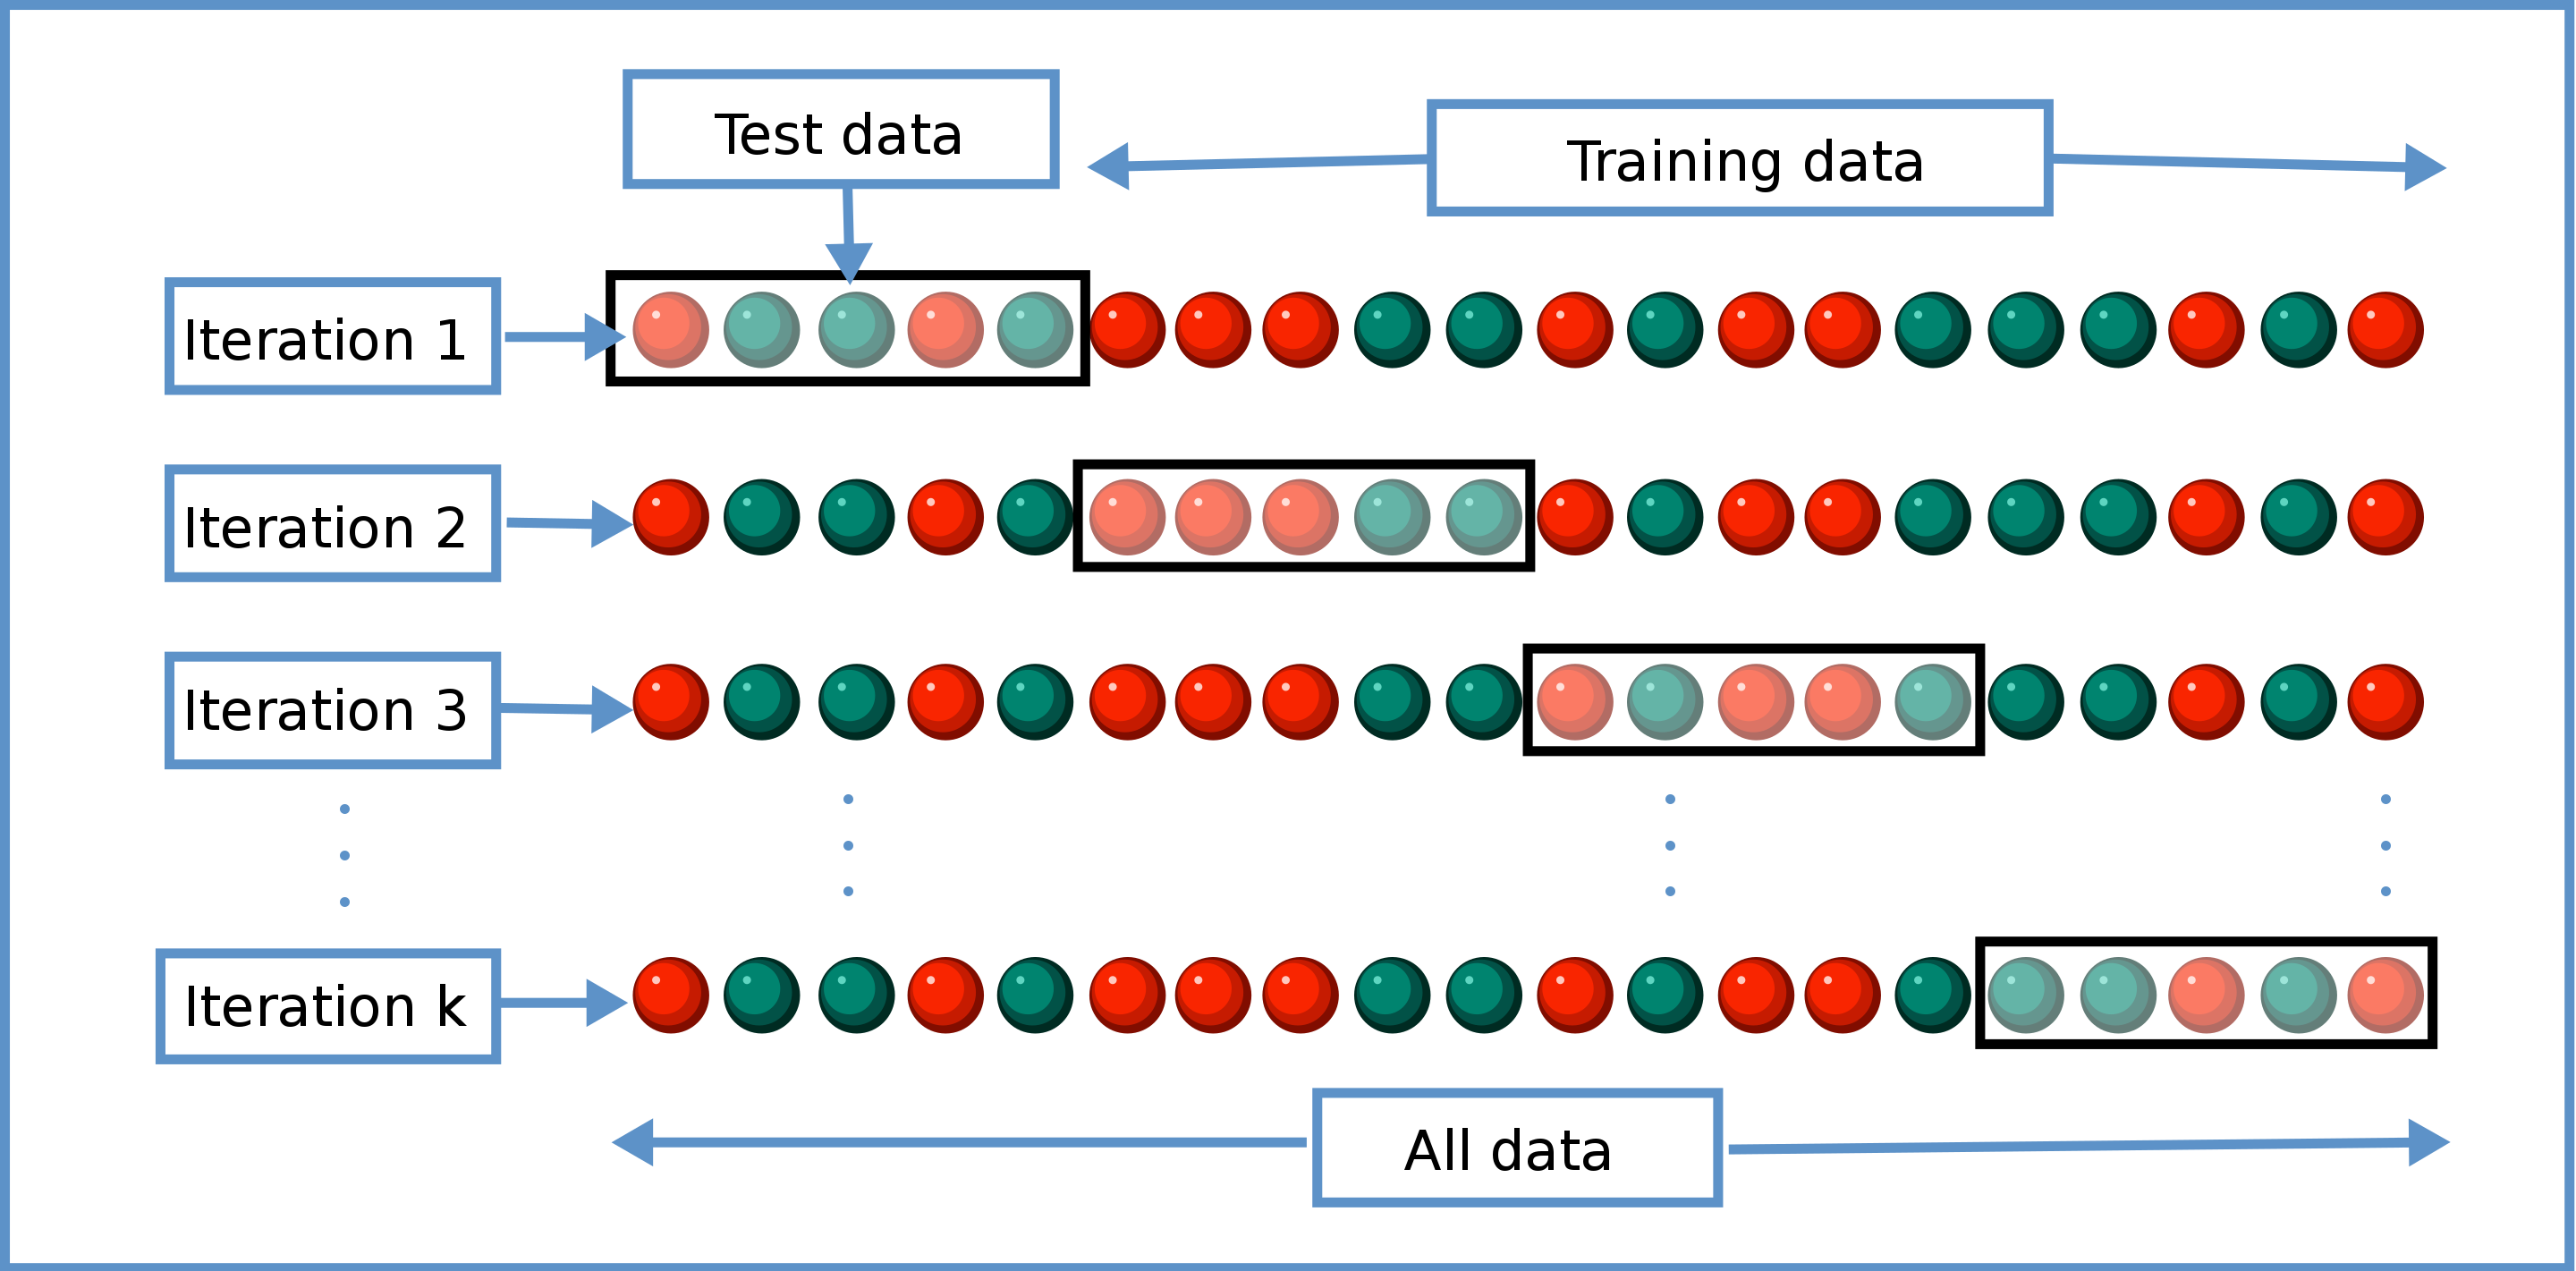

In [46]:
k_fold = KFold(n_splits=5)   
k_fold.get_n_splits(X) #get_n_splits  returns the number of splitting iterations 
accuracies = []

for train_idx, test_idx in k_fold.split(X):  #split generates indices to split data into training and test set.
    train_X, test_X = X[train_idx], X[test_idx]
    train_y, test_y = y[train_idx], y[test_idx]
    logreg = LogisticRegression(max_iter = 1000)
    logreg.fit(train_X, train_y)
    predictions = logreg.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    accuracies.append(accuracy)

print("The mean accuracy is: ", np.mean(accuracies))
print(accuracies)

The mean accuracy is:  0.9991397696903762
[0.9988413328183702, 0.9990519995786665, 0.9991046505503766, 0.9993855444953564, 0.9993153210091115]


<hr>

### Dealing with Imbalanced Data

- Collect more data? Nice strategy but not applicable in this case.
- Changing the performance metric:
  - Use the confusion matrix to calculate Precision, Recall
  - F1score (weighted average of precision recall)
  - ROC curves - calculates sensitivity/specificity ratio.
- Resampling the dataset:
  - Essentially this is a method that will process the data to have an approximate 50-50 ratio.
  - One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
  - Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)

#### Undersampling

In [47]:
# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("normal transactions: ", len(under_sample_data[under_sample_data.Class == 0]))
print("fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1]))
print("Total number of transactions in resampled data: ", len(under_sample_data))

normal transactions:  492
fraud transactions:  492
Total number of transactions in resampled data:  984


In [48]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

In [50]:
lr_undersample = LogisticRegression(max_iter = 300)
lr_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = lr_undersample.predict(X_test_undersample)
acc_undersample = round(accuracy_score(y_test_undersample,y_pred_undersample) * 100, 2)
acc_undersample

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


93.24

In [51]:
confusion_matrix(y_test_undersample,y_pred_undersample)

array([[139,  10],
       [ 10, 137]])

In [52]:
fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred_undersample)

No handles with labels found to put in legend.


Text(0.5, 0, 'False Positive Rate')

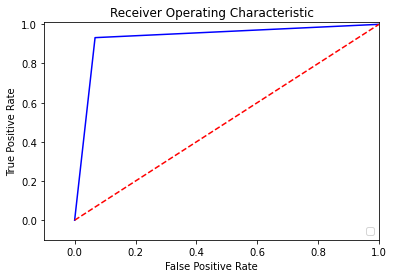

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<hr>

#### SMOTE

Link: https://www.researchgate.net/figure/The-basic-principle-of-the-synthetic-minority-oversample-technique-SMOTE-algorithm_fig2_332279195
<a href="https://www.researchgate.net/figure/The-basic-principle-of-the-synthetic-minority-oversample-technique-SMOTE-algorithm_fig2_332279195"><img src="https://www.researchgate.net/publication/332279195/figure/fig2/AS:745600182128640@1554776344042/The-basic-principle-of-the-synthetic-minority-oversample-technique-SMOTE-algorithm.png" alt="The basic principle of the synthetic minority oversample technique (SMOTE) algorithm."/></a>

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [55]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (213605, 29)
Number transactions y_train dataset:  (213605,)
Number transactions X_test dataset:  (71202, 29)
Number transactions y_test dataset:  (71202,)


In [58]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 213249 

After OverSampling, the shape of train_X: (426498, 29)
After OverSampling, the shape of train_y: (426498,) 

After OverSampling, counts of label '1': 213249
After OverSampling, counts of label '0': 213249


In [61]:
clf_smote = LogisticRegression()
clf_smote.fit(X_train_res, y_train_res)
y_pred_smote = clf_smote.predict(X_test)
confusion_matrix(y_test, y_pred_smote)

array([[69353,  1713],
       [   14,   122]])

In [62]:
accuracy_score(y_test, y_pred_smote)

0.9757450633409174